<a href="https://colab.research.google.com/github/rntombezz/posttest2-Daming/blob/main/107_Rinto_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

In [26]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
# data in the form of transaction list
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)

    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0            1     

<ipython-input-27-0f928d2872f2>:24: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)



                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(whole milk, semi-finished bread, sausage)           5.26%
(yogurt, semi-finished bread, sausage)               5.26%
(whole milk, yogurt, sausage)                        5.26%
(whole milk, yogurt, semi-finished bread)            5.26%
(yogurt, whole milk, semi-finished bread, sausage)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
white bread                         beef   5.26%    100.0

In [30]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

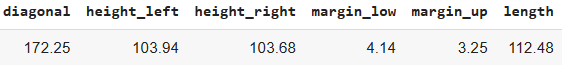
<!-- 1412 -->

In [31]:
import pandas as pd
import math


In [32]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [33]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [34]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# tentukan nilai K
K = round(len(df)**0.5)

# ambil K data terdekat
k_nearest_neighbors = df_sorted[:K]

# hitung label terbanyak
prediction = pd.DataFrame(k_nearest_neighbors['is_genuine'].mode())

print("Hasil prediksi: ")
print(prediction)

Hasil prediksi: 
   is_genuine
0        True


# (3) Analisis

> Nama :Rinto

> Nim :2109116107


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Judul "Bank Data Bisboll" donlod dibawah ini bang
https://drive.google.com/file/d/15WVlrH2MBFPHScy1veas444ZNsB6_Ksp/view?usp=sharing 

##Business Understanding

Dataset ini bertujuan untuk mengetahui dan mengelolah data tentang pemain, tim, dari player bisbol dari tahun 1871 hingga 2015

##Data Understanding

In [35]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [36]:
df = pd.read_csv("AllstarFull.csv")
df

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0
...,...,...,...,...,...,...,...,...
5064,boxbebr01,2015,0,NLS201507155,TBA,AL,NaN,NaN
5065,gordoal01,2015,0,NLS201507156,KCA,AL,NaN,NaN
5066,herreke01,2015,0,NLS201507157,KCA,AL,NaN,NaN
5067,cabremi01,2015,0,NLS201507158,DET,AL,NaN,NaN


In [37]:
df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [38]:
df.tail()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
5064,boxbebr01,2015,0,NLS201507155,TBA,AL,NaN,NaN
5065,gordoal01,2015,0,NLS201507156,KCA,AL,NaN,NaN
5066,herreke01,2015,0,NLS201507157,KCA,AL,NaN,NaN
5067,cabremi01,2015,0,NLS201507158,DET,AL,NaN,NaN
5068,salech01,2015,0,NLS201507159,CHA,AL,NaN,NaN


In [39]:
# df1 isinya dataset dengan label target boxbebr01
df1 = df[df['playerID'] == 'boxbebr01']

# Menampilkan hasil filter
print(df1)

       playerID  yearID  gameNum        gameID teamID lgID  GP  startingPos
5064  boxbebr01    2015        0  NLS201507155    TBA   AL NaN          NaN


In [40]:
# df2 isinya dataset dengan label target bukan KCA
df2 = df[df['teamID'] != 'KCA']

# Menampilkan hasil filter
print(df2)

       playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0     gomezle01    1933        0  ALS193307060    NYA   AL  1.0          1.0
1     ferreri01    1933        0  ALS193307060    BOS   AL  1.0          2.0
2     gehrilo01    1933        0  ALS193307060    NYA   AL  1.0          3.0
3     gehrich01    1933        0  ALS193307060    DET   AL  1.0          4.0
4     dykesji01    1933        0  ALS193307060    CHA   AL  1.0          5.0
...         ...     ...      ...           ...    ...  ...  ...          ...
5062  papeljo01    2015        0  NLS201507153    PHI   NL  NaN          NaN
5063  burneaj01    2015        0  NLS201507154    PIT   NL  NaN          NaN
5064  boxbebr01    2015        0  NLS201507155    TBA   AL  NaN          NaN
5067  cabremi01    2015        0  NLS201507158    DET   AL  NaN          NaN
5068   salech01    2015        0  NLS201507159    CHA   AL  NaN          NaN

[4976 rows x 8 columns]


In [41]:
# df3 isinya dataset dengan label target gomezle01
df3 = df[df['playerID'] == 'gomezle01']

# Menampilkan hasil filter
print(df3)

      playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0    gomezle01    1933        0  ALS193307060    NYA   AL  1.0          1.0
36   gomezle01    1934        0  NLS193407100    NYA   AL  1.0          1.0
77   gomezle01    1935        0  ALS193507080    NYA   AL  1.0          1.0
132  gomezle01    1936        0  NLS193607070    NYA   AL  0.0          NaN
161  gomezle01    1937        0  ALS193707070    NYA   AL  1.0          1.0
209  gomezle01    1938        0  NLS193807060    NYA   AL  1.0          1.0
273  gomezle01    1939        0  ALS193907110    NYA   AL  0.0          NaN


In [42]:
# df4 isinya dataset dengan label target yearID di bawah tahun 2000
df4 = df[df['yearID'] < 2000]

# Menampilkan hasil filter
print(df4)

       playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0     gomezle01    1933        0  ALS193307060    NYA   AL  1.0          1.0
1     ferreri01    1933        0  ALS193307060    BOS   AL  1.0          2.0
2     gehrilo01    1933        0  ALS193307060    NYA   AL  1.0          3.0
3     gehrich01    1933        0  ALS193307060    DET   AL  1.0          4.0
4     dykesji01    1933        0  ALS193307060    CHA   AL  1.0          5.0
...         ...     ...      ...           ...    ...  ...  ...          ...
3911  nilssda01    1999        0  ALS199907130    MIL   NL  1.0          NaN
3912  sheffga01    1999        0  ALS199907130    LAN   NL  1.0          NaN
3913  spraged02    1999        0  ALS199907130    PIT   NL  1.0          NaN
3914  wagnebi02    1999        0  ALS199907130    HOU   NL  1.0          NaN
3915  willisc01    1999        0  ALS199907130    CIN   NL  0.0          NaN

[3916 rows x 8 columns]


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   playerID     5069 non-null   object 
 1   yearID       5069 non-null   int64  
 2   gameNum      5069 non-null   int64  
 3   gameID       5020 non-null   object 
 4   teamID       5069 non-null   object 
 5   lgID         5069 non-null   object 
 6   GP           5050 non-null   float64
 7   startingPos  1580 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 316.9+ KB


In [44]:
df.select_dtypes(include=np.number)

,yearID,gameNum,GP,startingPos
0,1933,0,1.0,1.0
1,1933,0,1.0,2.0
2,1933,0,1.0,3.0
3,1933,0,1.0,4.0
4,1933,0,1.0,5.0
...,...,...,...,...
5064,2015,0,NaN,NaN
5065,2015,0,NaN,NaN
5066,2015,0,NaN,NaN
5067,2015,0,NaN,NaN


In [45]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [46]:
tampil("playerID")

Nilai minimum         : aaronha01
Nilai maksimum        : zobribe01


In [47]:
tampil("yearID")

Nilai minimum         : 1933
Nilai maksimum        : 2015


In [48]:
tampil("GP")

Nilai minimum         : 0.0
Nilai maksimum        : 1.0


##Eksplore Data

##Visualisai Comparison

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

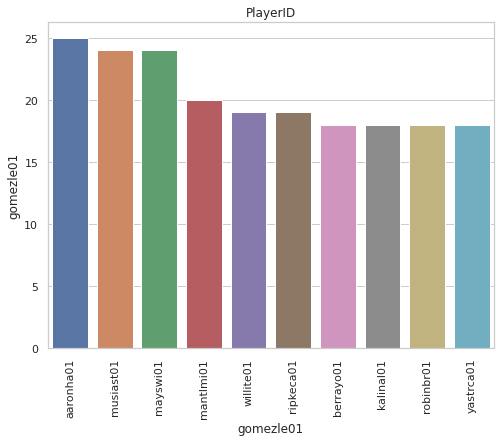

In [50]:
country_count = Counter(df['playerID'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('PlayerID')
plt.xlabel('gomezle01')
plt.ylabel('gomezle01')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [51]:
df.describe()

,yearID,gameNum,GP,startingPos
count,5069.000000,5069.000000,5050.000000,1580.000000
mean,1976.433024,0.136911,0.778218,5.037975
std,23.693503,0.461412,0.415486,2.653486
min,1933.000000,0.000000,0.000000,0.000000
25%,1958.000000,0.000000,1.000000,3.000000
50%,1976.000000,0.000000,1.000000,5.000000
75%,1998.000000,0.000000,1.000000,7.000000
max,2015.000000,2.000000,1.000000,10.000000


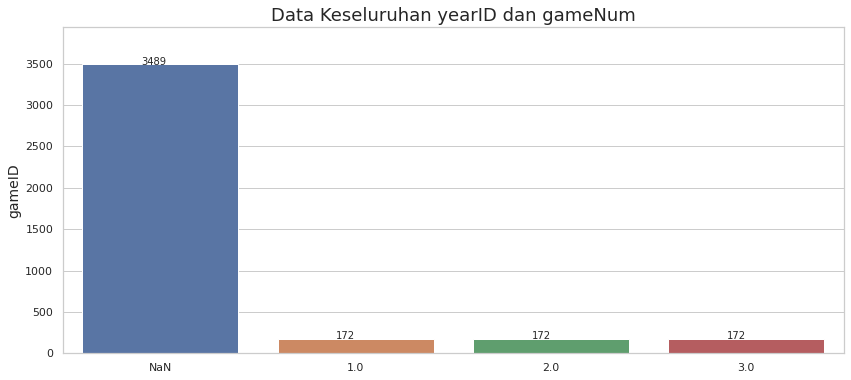

In [52]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['startingPos'].fillna('NaN').value_counts().index[0:4]
count = df['startingPos'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan yearID dan gameNum', fontsize = 18)

for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('gameID', fontsize = 14)
ax.set_ylim(0, df['GP'].fillna('NaN').value_counts()[0]+10)

plt.show()

##Visualisasi Distribution

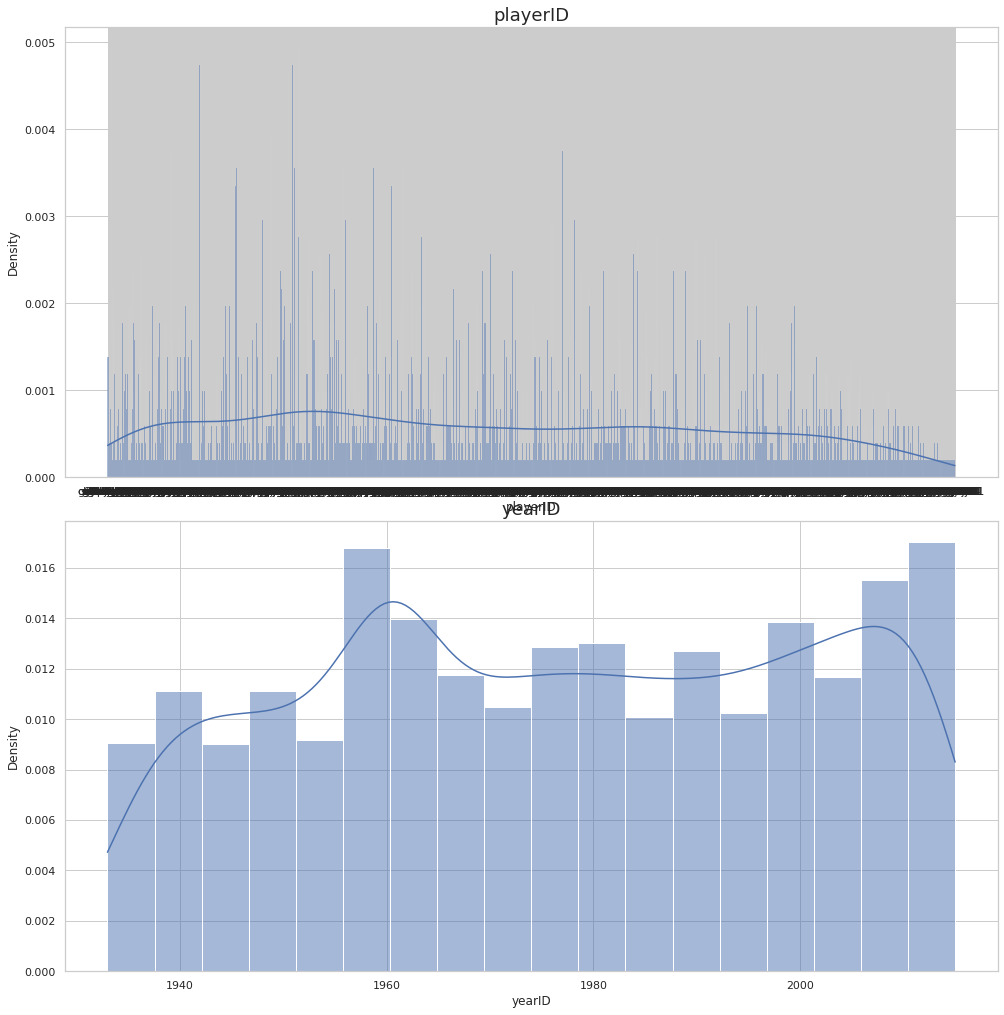

In [53]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['playerID', 'yearID']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    

plt.show()

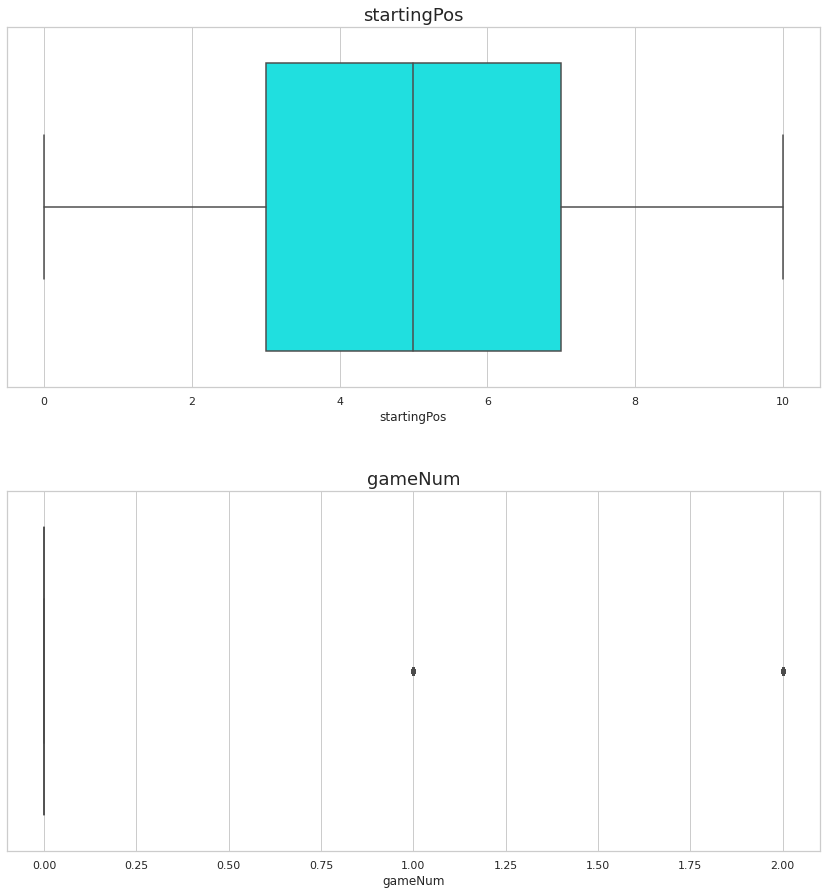

In [54]:
num_cols = ['startingPos', 'gameNum']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

##Visualisasi Relationship

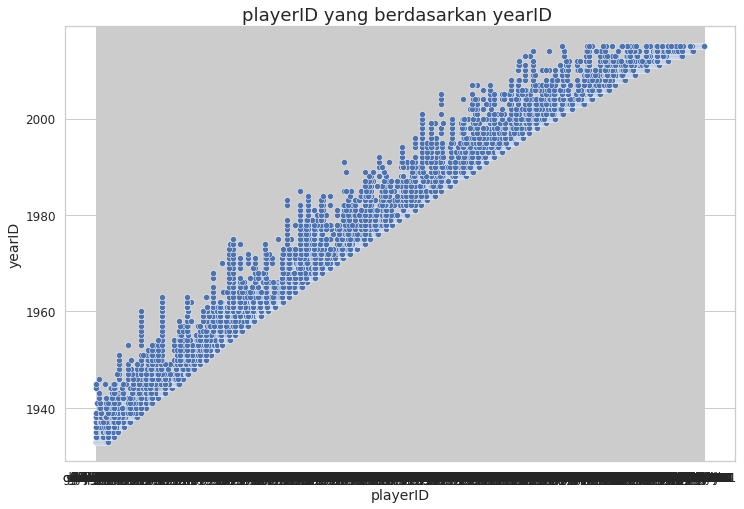

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="playerID", y="yearID")
ax.set_title('playerID yang berdasarkan yearID ', fontsize=18)
ax.set_xlabel('playerID', fontsize=14)
ax.set_ylabel('yearID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##Visualisai Composition

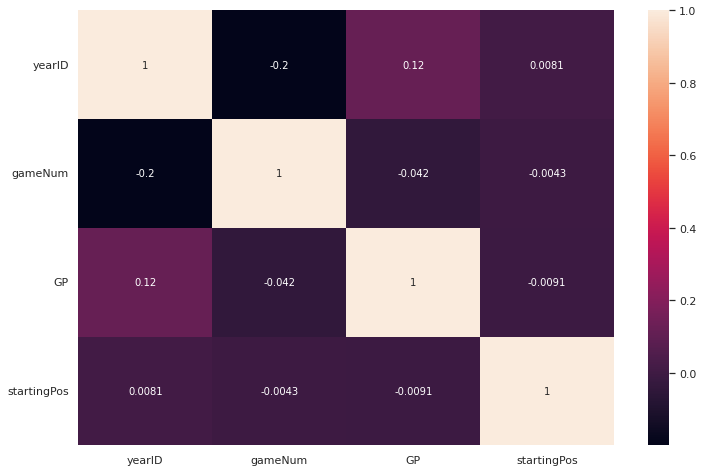

In [56]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

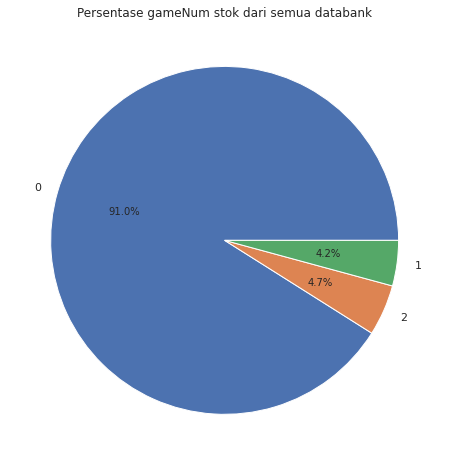

In [57]:
#Calculate count of each Level category
level_count = df['gameNum'].value_counts()

#Create pie chart for Level categories
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase gameNum stok dari semua databank')
plt.show()

##Verify data quality

In [58]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Check data types
print("Data types:\n", df.dtypes)


Missing values:
 playerID          0
yearID            0
gameNum           0
gameID           49
teamID            0
lgID              0
GP               19
startingPos    3489
dtype: int64
Number of duplicate rows: 0
Outliers:
 GP             1120
gameID            0
gameNum         454
lgID              0
playerID          0
startingPos       0
teamID            0
yearID            0
dtype: int64
Data types:
 playerID        object
yearID           int64
gameNum          int64
gameID          object
teamID          object
lgID            object
GP             float64
startingPos    float64
dtype: object


<ipython-input-58-1a4e1a793f1e>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


##Data Preparation

##Select Data

In [59]:
import pandas as pd

In [ ]:
df = pd.read_csv("AllstarFull.csv")

In [60]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["playerID", "yearID"]]

# Menampilkan Perintah
print(selected_data.head())

    playerID  yearID
0  gomezle01    1933
1  ferreri01    1933
2  gehrilo01    1933
3  gehrich01    1933
4  dykesji01    1933


In [61]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["playerID", "yearID", "gameID"]]

# Menampilkan Perintah
print(selected_data.head())

    playerID  yearID        gameID
0  gomezle01    1933  ALS193307060
1  ferreri01    1933  ALS193307060
2  gehrilo01    1933  ALS193307060
3  gehrich01    1933  ALS193307060
4  dykesji01    1933  ALS193307060


##Clean Data

In [62]:
df.isna().sum()

playerID          0
yearID            0
gameNum           0
gameID           49
teamID            0
lgID              0
GP               19
startingPos    3489
dtype: int64

In [63]:
df.isna().sum() / len(df) * 100

playerID        0.000000
yearID          0.000000
gameNum         0.000000
gameID          0.966660
teamID          0.000000
lgID            0.000000
GP              0.374827
startingPos    68.830144
dtype: float64

In [64]:
df["gameID"] = df["gameID"].fillna(df["gameID"].mode()[0])
df["GP"] = df["GP"].fillna(df["GP"].mode()[0])
df["startingPos"] = df["startingPos"].fillna(df["startingPos"].mode()[0])

In [65]:
df.isna().sum()

playerID       0
yearID         0
gameNum        0
gameID         0
teamID         0
lgID           0
GP             0
startingPos    0
dtype: int64

In [66]:
df.isna().sum() / len(df) * 100

playerID       0.0
yearID         0.0
gameNum        0.0
gameID         0.0
teamID         0.0
lgID           0.0
GP             0.0
startingPos    0.0
dtype: float64

##Construct Data

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("AllstarFull.csv")

In [69]:
# Buat fitur baru yang menghitung selisih nilai maksimum dan minimum setiap uang kertas
df["playerID"] = df["yearID"] - df["gameNum"]

#Menampilkan beberapa baris pertama dari kumpulan data yang dimodifikasi
print(df.head())

   playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0      1933    1933        0  ALS193307060    NYA   AL  1.0          1.0
1      1933    1933        0  ALS193307060    BOS   AL  1.0          2.0
2      1933    1933        0  ALS193307060    NYA   AL  1.0          3.0
3      1933    1933        0  ALS193307060    DET   AL  1.0          4.0
4      1933    1933        0  ALS193307060    CHA   AL  1.0          5.0


In [79]:
import pandas as pd

# Membuat DataFrame dummy untuk contoh
data = {'startingPos': ['1.0', '2.0', '3.0', '4.0'],
        'yearID': [1933, 1933, 1933, 1933]}
       

df = pd.DataFrame(data)

# Menghitung tahun dari setiap player di databank
df['yearID'] = df['yearID'] / ((df['yearID'] / 100) ** 2)

# Menghapus kolom yang tidak diperlukan
df = df.drop('yearID', axis=1)

# Menampilkan DataFrame setelah Construct Data
print(df)


  startingPos
0         1.0
1         2.0
2         3.0
3         4.0


##Integrate Data

In [71]:
df = pd.read_csv('AllstarFull.csv')

# Melakukan integrasi data dengan menambahkan kolom baru
df['yearID'] = df['gameNum'] + df['GP']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['startingPos'] == 'nilai_awal', 'startingPos'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['playerID', 'gameID'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu ")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu 


##Format Data

In [72]:
# Membaca file csv
df = pd.read_csv('AllstarFull.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['gameNum', 'GP'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['yearID'].mean()
df['yearID'] = df['yearID'].fillna(mean_value)

# Mengubah tipe data kolom4 dari string ke integer
df['yearID'] = df['yearID'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('playerID')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)